Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
data=pd.read_csv("/content/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(400, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


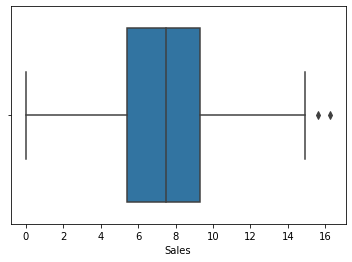

In [8]:
sns.boxplot(data.Sales)
plt.show()

In [9]:
print("Skewness :", data['Sales'].skew(), "Kurtoisis", data['Sales'].kurtosis())

Skewness : 0.18556036318721578 Kurtoisis -0.08087736743346197


In [10]:
corr = data.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [11]:
df=data.copy()

In [12]:
data.keys()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [13]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban', 'US'])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [14]:
df.Sales.mean()

7.496325

In [15]:
df["Sales"]=df["Sales"].apply(lambda x: "Small" if x<=7.49 else "Large") 

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Large,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Large,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Large,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Small,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Small,141,64,3,340,128,38,13,1,0,0,0,1,1,0


## Random Forest Model 

In [17]:
X=df.iloc[:,1:]
y=df["Sales"]

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
y_train.value_counts()

Small    166
Large    154
Name: Sales, dtype: int64

In [23]:
RF=RandomForestClassifier(n_estimators = 150,oob_score =True,criterion ='entropy')

In [24]:
params={"n_jobs": np.array(range(1,10))}

In [25]:
model= GridSearchCV(RF,param_grid=params)

In [27]:
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=None,
                                              oob_score=True, 

In [28]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=7,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
model.best_params_

{'n_jobs': 7}

In [30]:
RFM=RandomForestClassifier(n_jobs=7, n_estimators = 150,oob_score =True,criterion ='entropy')

In [31]:
model1=RFM.fit(X_train,y_train)

In [32]:
train_pred=model1.predict(X_train)

In [33]:
accuracy_score(y_train,train_pred)

1.0

In [34]:
confusion_matrix(y_train,train_pred)

array([[154,   0],
       [  0, 166]])

In [35]:
y_pred=model1.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.8

In [37]:
confusion_matrix(y_test,y_pred)

array([[34, 11],
       [ 5, 30]])

In [43]:
model1.feature_importances_

array([0.11700524, 0.0950117 , 0.08711028, 0.09514745, 0.22907588,
       0.12929827, 0.06217934, 0.04991427, 0.06133016, 0.02510718,
       0.01344106, 0.01230595, 0.01260885, 0.01046437])

In [46]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [47]:
fi.head()

,feature,importance
4,Price,0.229076
5,Age,0.129298
0,CompPrice,0.117005
3,Population,0.095147
1,Income,0.095012


Conclusion: As seen in the confusion matrix of Test data 64 instances are presdected correctly and 16 instances are not